In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score


In [2]:
df = pd.read_csv("../data/simulated_health_wellness_data.csv")
df.head()


,Exercise_Time_Min,Healthy_Meals_Per_Day,Sleep_Hours_Per_Night,Stress_Level,BMI
0,34.967142,5,7.618856,2,33.068556
1,28.617357,8,4.105473,7,27.267672
2,36.476885,4,6.024123,1,23.779217
3,45.230299,1,8.565319,8,29.820436
4,27.658466,3,8.301648,3,30.947352


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Exercise_Time_Min      200 non-null    float64
 1   Healthy_Meals_Per_Day  200 non-null    int64  
 2   Sleep_Hours_Per_Night  200 non-null    float64
 3   Stress_Level           200 non-null    int64  
 4   BMI                    200 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 7.9 KB


In [4]:
df.describe()


,Exercise_Time_Min,Healthy_Meals_Per_Day,Sleep_Hours_Per_Night,Stress_Level,BMI
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,29.592290,2.875000,6.933582,4.995000,25.150008
std,9.310039,1.815449,1.422471,2.605556,5.070778
min,3.802549,0.000000,1.778787,1.000000,12.502971
25%,22.948723,2.000000,5.967243,3.000000,21.458196
50%,29.958081,3.000000,6.972331,5.000000,25.155662
75%,35.008525,4.000000,7.886509,7.000000,28.011155
max,57.201692,9.000000,10.708419,9.000000,37.898547


In [5]:
df.isnull().sum()


Exercise_Time_Min        0
Healthy_Meals_Per_Day    0
Sleep_Hours_Per_Night    0
Stress_Level             0
BMI                      0
dtype: int64

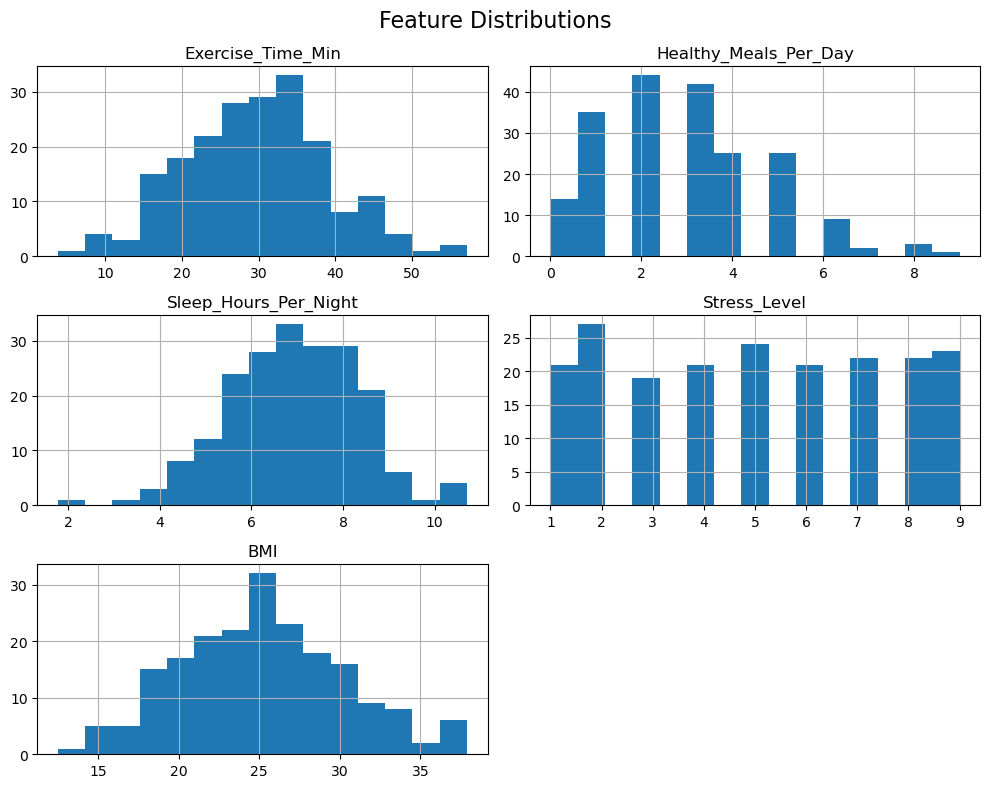

In [6]:
df.hist(bins=15, figsize=(10, 8))
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


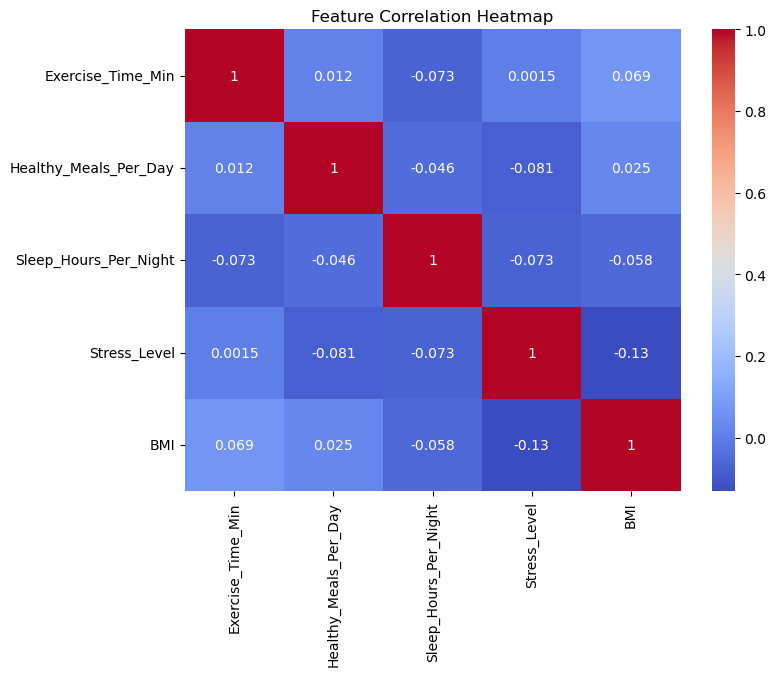

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [8]:
from sklearn.preprocessing import StandardScaler

X = df.copy()  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [68]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convert to DataFrame for easier plotting
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])


In [69]:
# K-Means Clustering
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_labels_pca = kmeans_pca.fit_predict(X_pca_df)
X_pca_df['KMeans_Cluster'] = kmeans_labels_pca

# Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clust.fit_predict(X_pca_df[['PC1', 'PC2']])
X_pca_df['Agglomerative_Cluster'] = agg_labels

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca_df[['PC1', 'PC2']])
X_pca_df['DBSCAN_Cluster'] = dbscan_labels


C:\Users\roop1\anaconda3\envs\lab2_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [70]:
from sklearn.metrics import silhouette_score

sil_score_kmeans = silhouette_score(X_pca_df[['PC1', 'PC2']], X_pca_df['KMeans_Cluster'])
sil_score_agglo = silhouette_score(X_pca_df[['PC1', 'PC2']], X_pca_df['Agglomerative_Cluster'])

if len(set(X_pca_df['DBSCAN_Cluster'])) > 1:
    sil_score_dbscan = silhouette_score(X_pca_df[['PC1', 'PC2']], X_pca_df['DBSCAN_Cluster'])
else:
    sil_score_dbscan = None

print("✅ Silhouette Scores:")
print(f"K-Means: {sil_score_kmeans:.3f}")
print(f"Agglomerative: {sil_score_agglo:.3f}")
print(f"DBSCAN: {sil_score_dbscan if sil_score_dbscan else 'Not applicable (only 1 cluster or noise)'}")


✅ Silhouette Scores:
K-Means: 0.363
Agglomerative: 0.334
DBSCAN: 0.3113036865375921


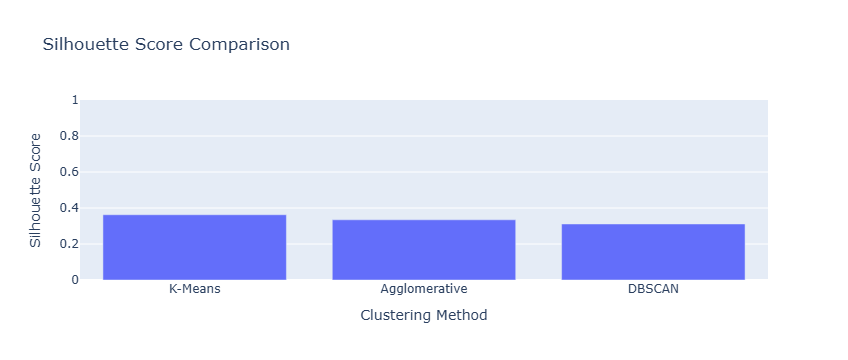

In [71]:
import plotly.graph_objects as go

methods = ['K-Means', 'Agglomerative', 'DBSCAN']
sil_scores = [sil_score_kmeans, sil_score_agglo, sil_score_dbscan if sil_score_dbscan else 0]

fig = go.Figure(data=[go.Bar(x=methods, y=sil_scores)])
fig.update_layout(title='Silhouette Score Comparison',
                  xaxis_title='Clustering Method',
                  yaxis_title='Silhouette Score',
                  yaxis=dict(range=[0, 1]))
fig.show()


In [72]:
from sklearn.cluster import KMeans

# We'll assume 3 clusters for now, you can change based on Elbow method later
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca_df)

# Add cluster labels to the PCA dataframe
X_pca_df['Cluster'] = kmeans_labels


C:\Users\roop1\anaconda3\envs\lab2_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



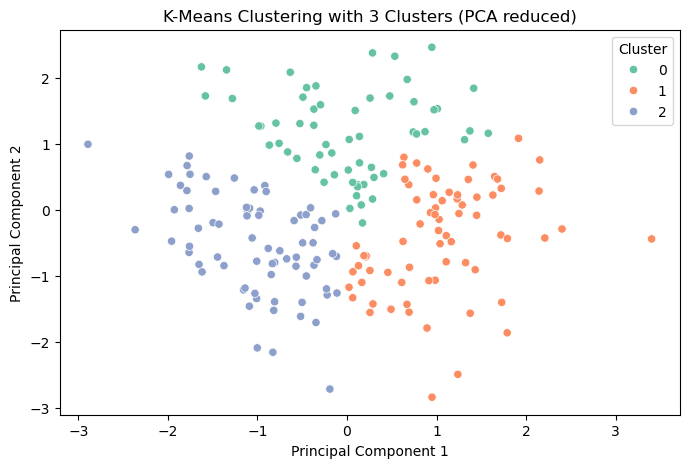

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='Set2', data=X_pca_df)
plt.title('K-Means Clustering with 3 Clusters (PCA reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


In [89]:
sil_score_kmeans = silhouette_score(X_pca_df[['PC1', 'PC2']], kmeans_labels)
db_score_kmeans = davies_bouldin_score(X_pca_df[['PC1', 'PC2']], kmeans_labels)

print(f"Silhouette Score (K-Means): {sil_score_kmeans}")
print(f"Davies-Bouldin Index (K-Means): {db_score_kmeans}")


Silhouette Score (K-Means): 0.34979257821794235
Davies-Bouldin Index (K-Means): 0.926619256790323


In [75]:
from sklearn.cluster import AgglomerativeClustering

agg_clust = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clust.fit_predict(X_pca_df[['PC1', 'PC2']])

# Add to DataFrame
X_pca_df['Agglomerative_Cluster'] = agg_labels


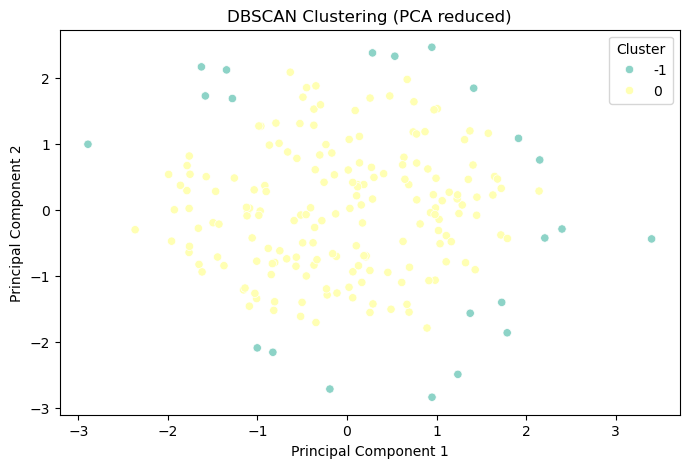

Silhouette Score (DBSCAN): 0.3113036865375921
Davies-Bouldin Index (DBSCAN): 6.145517340876014


In [76]:
from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(X_pca_df[['PC1', 'PC2']])

# Add to DataFrame
X_pca_df['DBSCAN_Cluster'] = dbscan_labels

# Visualize
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN_Cluster', palette='Set3', data=X_pca_df)
plt.title('DBSCAN Clustering (PCA reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Only calculate scores if DBSCAN formed more than 1 cluster
if len(set(dbscan_labels)) > 1:
    sil_score_dbscan = silhouette_score(X_pca_df[['PC1', 'PC2']], dbscan_labels)
    db_score_dbscan = davies_bouldin_score(X_pca_df[['PC1', 'PC2']], dbscan_labels)
else:
    sil_score_dbscan = 0
    db_score_dbscan = 0

print(f"Silhouette Score (DBSCAN): {sil_score_dbscan}")
print(f"Davies-Bouldin Index (DBSCAN): {db_score_dbscan}")


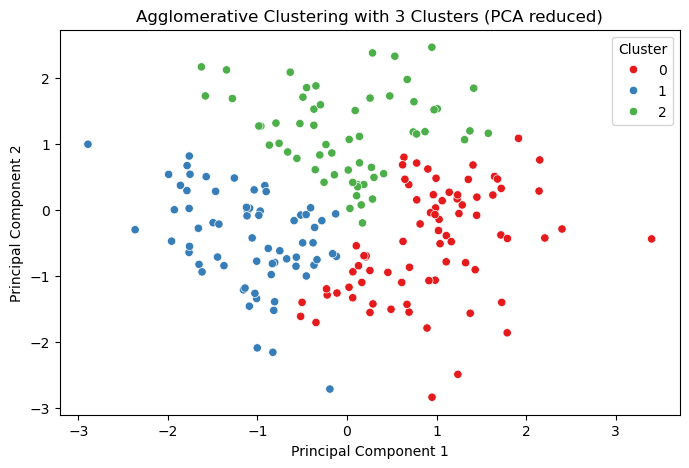

In [77]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PC1', y='PC2', hue='Agglomerative_Cluster', palette='Set1', data=X_pca_df)
plt.title('Agglomerative Clustering with 3 Clusters (PCA reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


In [78]:
sil_score_agg = silhouette_score(X_pca_df[['PC1', 'PC2']], agg_labels)
db_score_agg = davies_bouldin_score(X_pca_df[['PC1', 'PC2']], agg_labels)

print(f"Silhouette Score (Agglomerative): {sil_score_agg}")
print(f"Davies-Bouldin Index (Agglomerative): {db_score_agg}")


Silhouette Score (Agglomerative): 0.33440287604087515
Davies-Bouldin Index (Agglomerative): 0.9484884757995276


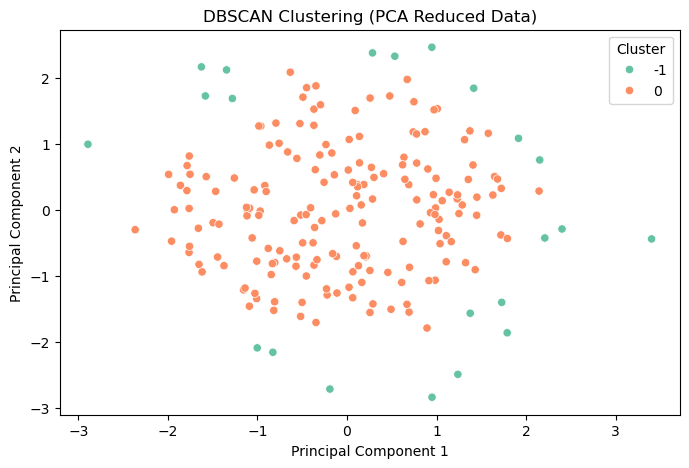

In [80]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN_Cluster', palette='Set2', data=X_pca_df)
plt.title('DBSCAN Clustering (PCA Reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


In [81]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [82]:
# Evaluate only if more than 1 cluster was found (ignoring noise label -1)
if len(set(db_labels)) > 1 and -1 not in set(db_labels):
    sil_score_dbscan = silhouette_score(X_pca_df[['PC1', 'PC2']], db_labels)
    db_score_dbscan = davies_bouldin_score(X_pca_df[['PC1', 'PC2']], db_labels)
else:
    sil_score_dbscan = None
    db_score_dbscan = None

print(f"Silhouette Score (DBSCAN): {sil_score_dbscan}")
print(f"Davies-Bouldin Index (DBSCAN): {db_score_dbscan}")


Silhouette Score (DBSCAN): None
Davies-Bouldin Index (DBSCAN): None


In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)  # replace df with your actual DataFrame (excluding any non-numeric columns)


In [84]:
# KMeans
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(X_scaled)

# Agglomerative Clustering
agglo_model = AgglomerativeClustering(n_clusters=3)
agglo_model.fit(X_scaled)

# DBSCAN
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_model.fit(X_scaled)


C:\Users\roop1\anaconda3\envs\lab2_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



DBSCAN()

In [85]:
from sklearn.metrics import silhouette_score

# Get the cluster labels
labels_kmeans = kmeans_model.labels_
labels_agglo = agglo_model.labels_
labels_dbscan = dbscan_model.labels_

# Compute silhouette scores
sil_score_kmeans = silhouette_score(X_scaled, labels_kmeans)
sil_score_agglo = silhouette_score(X_scaled, labels_agglo)

# Only compute DBSCAN score if it found more than 1 cluster
if len(set(labels_dbscan)) > 1:
    sil_score_dbscan = silhouette_score(X_scaled, labels_dbscan)
else:
    sil_score_dbscan = -1  # Assign -1 if DBSCAN didn't form multiple clusters

# Display the results
print("Silhouette Scores:")
print(f"K-Means: {sil_score_kmeans:.3f}")
print(f"Agglomerative: {sil_score_agglo:.3f}")
print(f"DBSCAN: {sil_score_dbscan:.3f}")


Silhouette Scores:
K-Means: 0.152
Agglomerative: 0.136
DBSCAN: -1.000


In [86]:
from sklearn.metrics import silhouette_score

# Assuming you've already defined and fit these models:
# kmeans_model, agglo_model, dbscan_model
# and `X_scaled` is your scaled dataset

# Get the labels from each model
labels_kmeans = kmeans_model.labels_
labels_agglo = agglo_model.labels_
labels_dbscan = dbscan_model.labels_

# Compute silhouette scores
sil_score_kmeans = silhouette_score(X_scaled, labels_kmeans)
sil_score_agglo = silhouette_score(X_scaled, labels_agglo)
# For DBSCAN, only compute if there are >1 clusters
sil_score_dbscan = silhouette_score(X_scaled, labels_dbscan) if len(set(labels_dbscan)) > 1 else 0


In [87]:
from sklearn.metrics import davies_bouldin_score

# Compute DBI for each model
db_score_kmeans = davies_bouldin_score(X_scaled, labels_kmeans)
db_score_agglo = davies_bouldin_score(X_scaled, labels_agglo)

# DBSCAN: only compute if more than one cluster
if len(set(labels_dbscan)) > 1:
    db_score_dbscan = davies_bouldin_score(X_scaled, labels_dbscan)
else:
    db_score_dbscan = -1  # or float('nan') if preferred


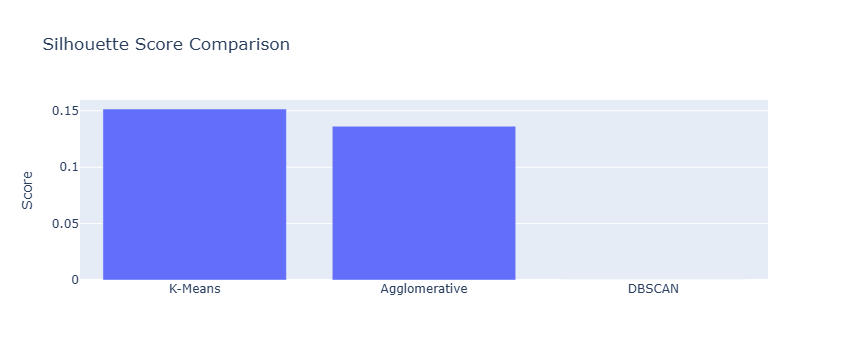

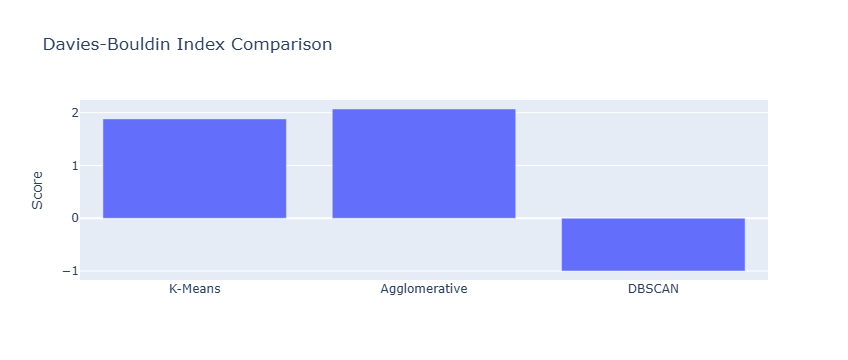

In [88]:
import plotly.graph_objects as go

methods = ['K-Means', 'Agglomerative', 'DBSCAN']
silhouette_scores = [sil_score_kmeans, sil_score_agglo, sil_score_dbscan]
dbi_scores = [db_score_kmeans, db_score_agglo, db_score_dbscan]

# Silhouette Score Chart
fig1 = go.Figure([go.Bar(x=methods, y=silhouette_scores)])
fig1.update_layout(title='Silhouette Score Comparison', yaxis_title='Score')
fig1.show()

# Davies-Bouldin Index Chart
fig2 = go.Figure([go.Bar(x=methods, y=dbi_scores)])
fig2.update_layout(title='Davies-Bouldin Index Comparison', yaxis_title='Score')
fig2.show()
